# 1 K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from utils import *

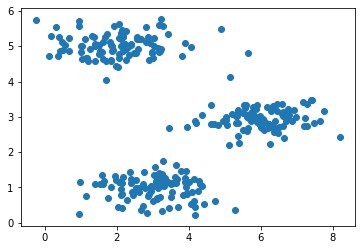

In [2]:
X = loadmat('../data/ex7data2.mat')['X']*1.0
plt.scatter(X[:,0], X[:,1])
plt.show()

## 1.1 Implementing K-means
code in utils.py

## 1.2 K-means on example dataset

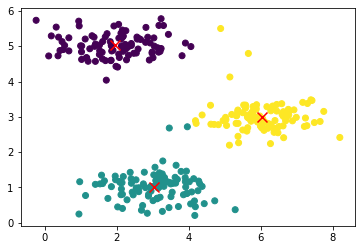

In [3]:
K = 3
initial_centroids = np.array([[3, 3],
                              [6, 2],
                              [8, 5]])
C, centroids = run_k_means(X, initial_centroids)
plot_k_means(X,C,centroids)

## 1.3 Random initialization

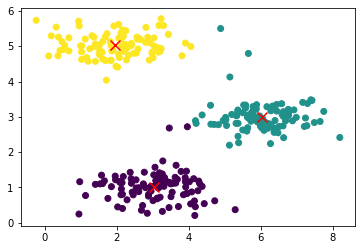

In [4]:
K = 3
initial_centroids = k_means_init_centroids(X,K)
C, centroids = run_k_means(X, initial_centroids)
plot_k_means(X,C,centroids)

## 1.4 Image compression with K-means

(128, 128, 3)
float32


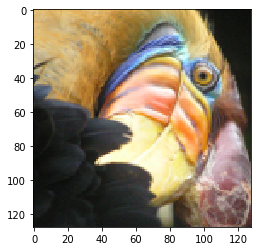

In [5]:
A = plt.imread('../data/bird_small.png')
print(A.shape)
print(A.dtype)
plt.imshow(A)

### 1.4.1 K-means on pixels

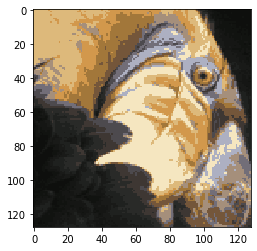

In [6]:
X = np.reshape(A, [A.shape[0] * A.shape[1], 3])
K = 16
initial_centroids = k_means_init_centroids(X,K)

C, centroids = run_k_means(X, initial_centroids)

X_compress = np.zeros_like(X)
for i in range(K):
    X_compress[C==i] = centroids[i]

A_compress = np.reshape(X_compress, A.shape)
plt.imshow(A_compress)